# MLP
Mean RCI over 14 cell lines.

This notebook uses
mRNA, canonical, no middle-exclusion train, yes middle-exclusion test, 0 threshold, learning module, cross-validation.



In [1]:
SEED = 45
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 20:45:56.861674


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0.model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'ZERO'   # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = 0  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = False
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = True
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = True
MIDDLE_LOW          = -1   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         =  1   #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.pc_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.pc_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_pc_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_pc_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [1]  # H1.hESC   
print('Exclusions',EXCLUSIONS)

Exclusions [1]


In [6]:
from tensorflow import keras
from keras import models
import pickle

def save_model(model, discriminator, filename1, filename2):
    filepath = MODEL_DIR + filename1
    model.save(filepath)
    print('Saved model 1 to',filepath)
    filepath = MODEL_DIR + filename2
    pickle.dump(discriminator, open(filepath, 'wb'))
    print('Saved model 2 to',filepath)

def load_model(filename1, filename2):
    filepath = MODEL_DIR + filename1
    model = keras.models.load_model(filepath)
    print('Loaded model 1 from',filepath)
    filepath = MODEL_DIR + filename2
    discriminator = pickle.load(open(filepath, 'rb'))        
    print('Loaded model 2 from',filepath)
    return model, discriminator
        

2023-04-29 20:45:58.763139
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.pc_RCI.all_cell_lines.csv
Number of RCI values loaded 13663
Num RCI: 13663
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_pc_transcripts.csv
Loaded 13663 sequences.

Training # 1 1
2023-04-29 20:46:52.862193
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.1.1.validation_genes.txt
Discriminator ZERO 0
Train 1:0 5766:5164 52.75%
Computed class weights: {0: 1.058288148721921, 1: 0.947797433229275}
Valid 1:0 564:600 48.45%
FIT


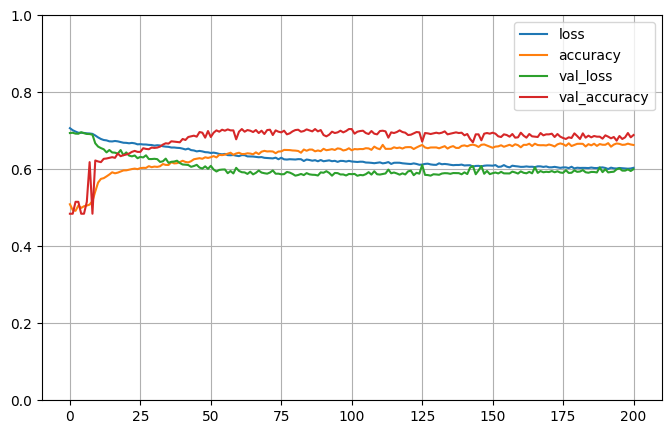


Testing # 1 1
2023-04-29 20:52:34.881690
PREDICT
Test 1:0 564:600 48.45%
Predict 1:0 472:692 40.55%
Test sizes (1164, 1025) (1164,)
Distrib of scores: 0.46626702 mean 0.18140796 std
Range of scores: 0.13674156 to 0.9775166
Score threshold 0.5
Confusion matrix
 [[474 126]
 [218 346]]
Normalized matrix
 [[0.40721649 0.10824742]
 [0.18728522 0.29725086]]
Extreme scores correct, pos:neg 184 286
Extreme scores incorrect pos:neg 32 85


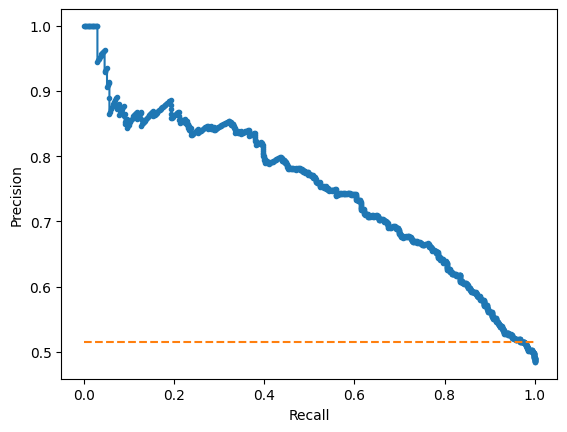

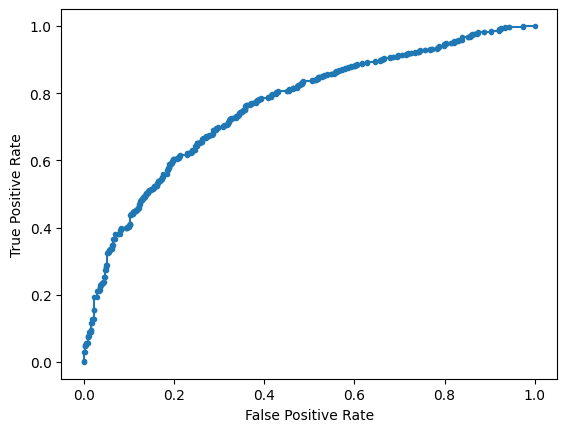

Accuracy: 70.45% Precision: 73.31% Recall: 61.35%
F1: 66.80% MCC: 0.4107
AUPRC: 75.11% AUROC: 76.21%
 accuracy [70.44673539518901]
 precision [73.30508474576271]
 recall [61.347517730496456]
 F1 [66.79536679536679]
 MCC [0.41068415926130475]
 AUPRC [75.10944409509072]
 AUROC [76.21424349881795]

Training # 1 2
2023-04-29 20:52:35.646217
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.1.2.validation_genes.txt
Discriminator ZERO 0
Train 1:0 5693:5237 52.09%
Computed class weights: {0: 1.0435363757876648, 1: 0.9599508167925522}
Valid 1:0 629:540 53.81%
FIT


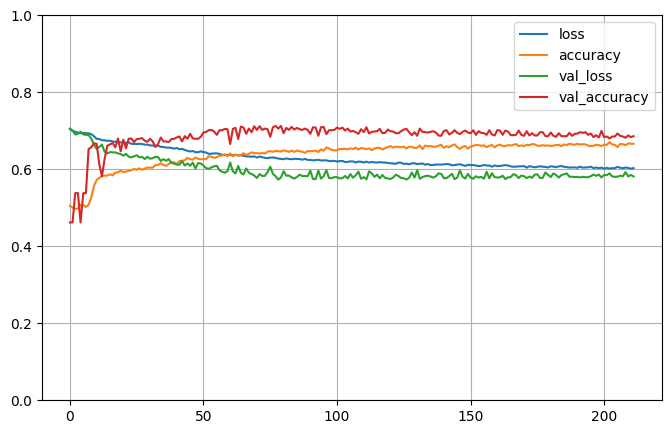


Testing # 1 2
2023-04-29 20:58:59.383310
PREDICT
Test 1:0 629:540 53.81%
Predict 1:0 659:510 56.37%
Test sizes (1169, 1025) (1169,)
Distrib of scores: 0.54129255 mean 0.20159101 std
Range of scores: 0.11149766 to 0.9867269
Score threshold 0.5
Confusion matrix
 [[355 185]
 [155 474]]
Normalized matrix
 [[0.30367836 0.15825492]
 [0.13259196 0.40547476]]
Extreme scores correct, pos:neg 318 194
Extreme scores incorrect pos:neg 71 54


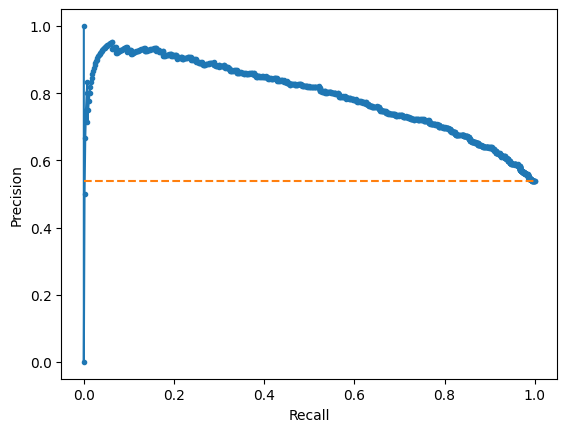

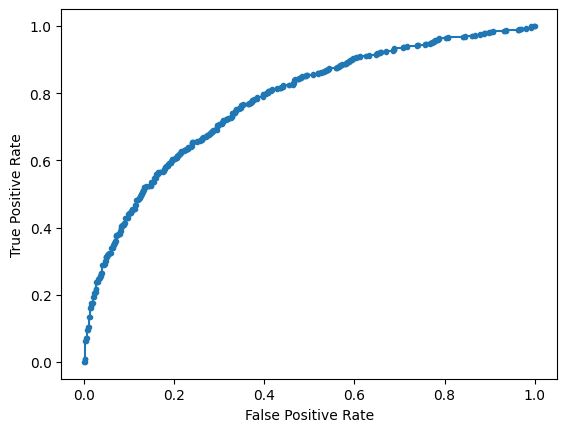

Accuracy: 70.92% Precision: 71.93% Recall: 75.36%
F1: 73.60% MCC: 0.4132
AUPRC: 79.33% AUROC: 77.49%
 accuracy [70.91531223267751]
 precision [71.92716236722306]
 recall [75.3577106518283]
 F1 [73.60248447204968]
 MCC [0.4131615186359779]
 AUPRC [79.33034159491015]
 AUROC [77.48719307542838]

Training # 1 3
2023-04-29 20:59:00.299588
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.1.3.validation_genes.txt
Discriminator ZERO 0
Train 1:0 5720:5210 52.33%
Computed class weights: {0: 1.0489443378119, 1: 0.9554195804195804}
Valid 1:0 589:603 49.41%
FIT


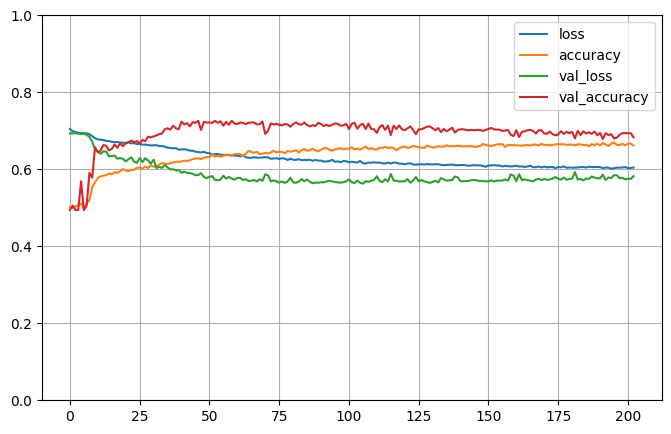


Testing # 1 3
2023-04-29 21:04:38.520950
PREDICT
Test 1:0 589:603 49.41%
Predict 1:0 558:634 46.81%
Test sizes (1192, 1025) (1192,)
Distrib of scores: 0.4910699 mean 0.20251893 std
Range of scores: 0.1388958 to 0.98479426
Score threshold 0.5
Confusion matrix
 [[452 151]
 [182 407]]
Normalized matrix
 [[0.37919463 0.12667785]
 [0.15268456 0.34144295]]
Extreme scores correct, pos:neg 245 285
Extreme scores incorrect pos:neg 51 76


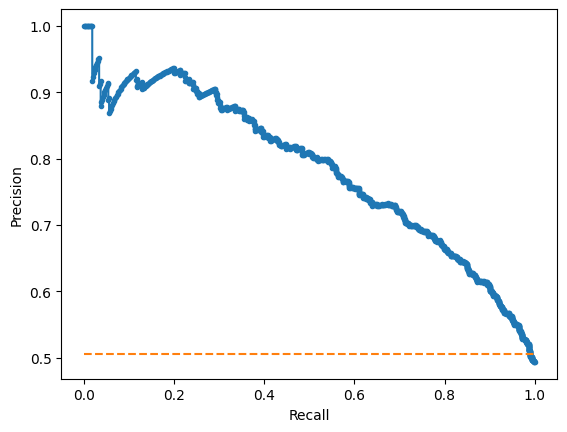

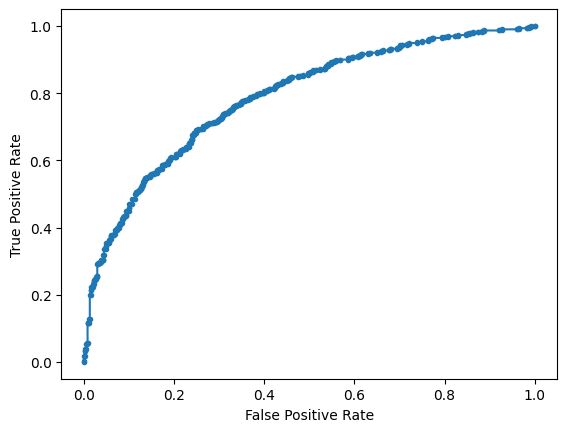

Accuracy: 72.06% Precision: 72.94% Recall: 69.10%
F1: 70.97% MCC: 0.4415
AUPRC: 78.42% AUROC: 78.68%
 accuracy [72.06375838926175]
 precision [72.93906810035843]
 recall [69.10016977928693]
 F1 [70.96774193548389]
 MCC [0.4414549148707409]
 AUPRC [78.41663300975097]
 AUROC [78.67805849079447]

Training # 1 4
2023-04-29 21:04:39.235785
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.1.4.validation_genes.txt
Discriminator ZERO 0
Train 1:0 5770:5161 52.79%
Computed class weights: {0: 1.059000193760899, 1: 0.9472270363951473}
Valid 1:0 573:597 48.97%
FIT


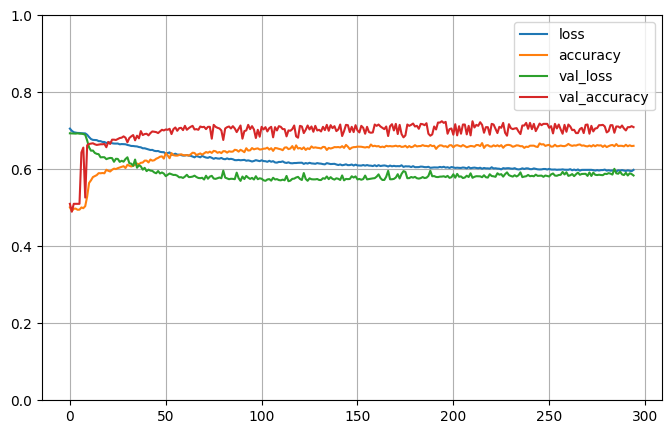


Testing # 1 4
2023-04-29 21:13:02.794930
PREDICT
Test 1:0 573:597 48.97%
Predict 1:0 481:689 41.11%
Test sizes (1170, 1025) (1170,)
Distrib of scores: 0.48129746 mean 0.1995429 std
Range of scores: 0.10522315 to 0.9909702
Score threshold 0.5
Confusion matrix
 [[482 115]
 [207 366]]
Normalized matrix
 [[0.41196581 0.0982906 ]
 [0.17692308 0.31282051]]
Extreme scores correct, pos:neg 190 274
Extreme scores incorrect pos:neg 39 71


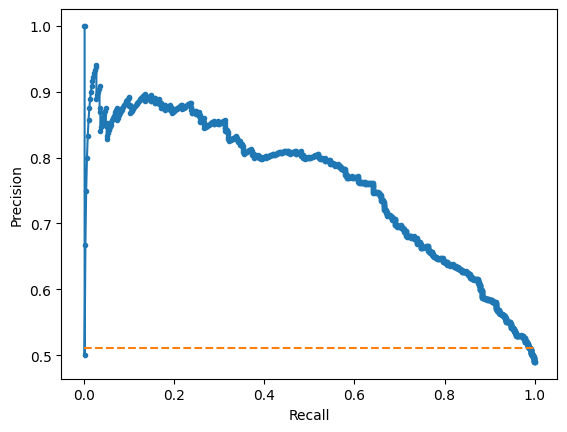

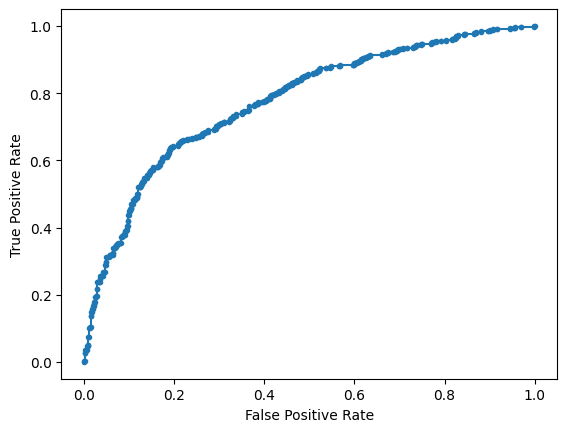

Accuracy: 72.48% Precision: 76.09% Recall: 63.87%
F1: 69.45% MCC: 0.4532
AUPRC: 75.98% AUROC: 77.54%
 accuracy [72.47863247863248]
 precision [76.0914760914761]
 recall [63.87434554973822]
 F1 [69.44971537001898]
 MCC [0.4532395808422326]
 AUPRC [75.98152672593685]
 AUROC [77.53806846916373]

Training # 1 5
2023-04-29 21:13:03.793100
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.1.5.validation_genes.txt
Discriminator ZERO 0
Train 1:0 5723:5208 52.36%
Computed class weights: {0: 1.0494431643625193, 1: 0.9550061156735977}
Valid 1:0 619:566 52.24%
FIT


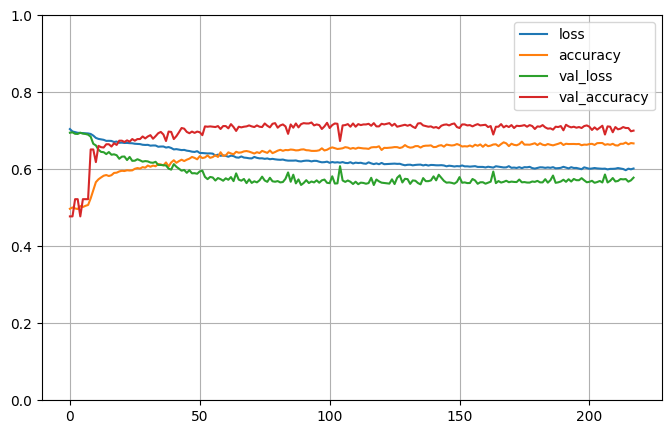


Testing # 1 5
2023-04-29 21:19:27.790299
PREDICT
Test 1:0 619:566 52.24%
Predict 1:0 621:564 52.41%
Test sizes (1185, 1025) (1185,)
Distrib of scores: 0.52651143 mean 0.2208174 std
Range of scores: 0.09133299 to 0.9837318
Score threshold 0.5
Confusion matrix
 [[399 167]
 [165 454]]
Normalized matrix
 [[0.33670886 0.14092827]
 [0.13924051 0.38312236]]
Extreme scores correct, pos:neg 329 245
Extreme scores incorrect pos:neg 63 77


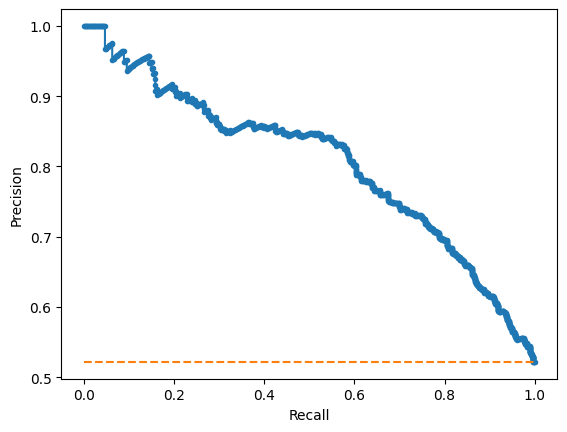

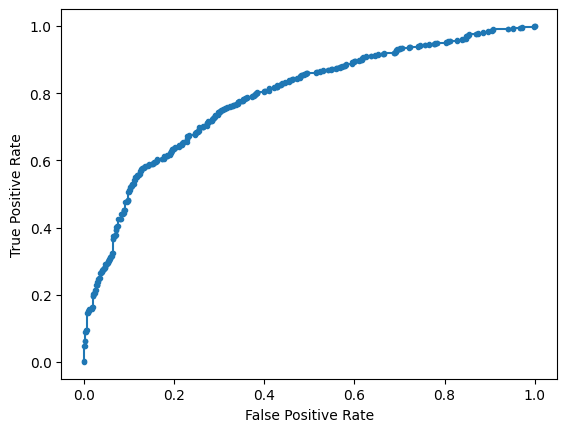

Accuracy: 71.98% Precision: 73.11% Recall: 73.34%
F1: 73.23% MCC: 0.4385
AUPRC: 80.52% AUROC: 78.66%
 accuracy [71.9831223628692]
 precision [73.10789049919485]
 recall [73.34410339256866]
 F1 [73.22580645161291]
 MCC [0.43845686654298976]
 AUPRC [80.52407894484747]
 AUROC [78.66015515735513]

Training # 2 1
2023-04-29 21:19:28.477483
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.2.1.validation_genes.txt
Discriminator ZERO 0
Train 1:0 5739:5191 52.51%
Computed class weights: {0: 1.0527836640339048, 1: 0.9522564906778185}
Valid 1:0 596:575 50.90%
FIT


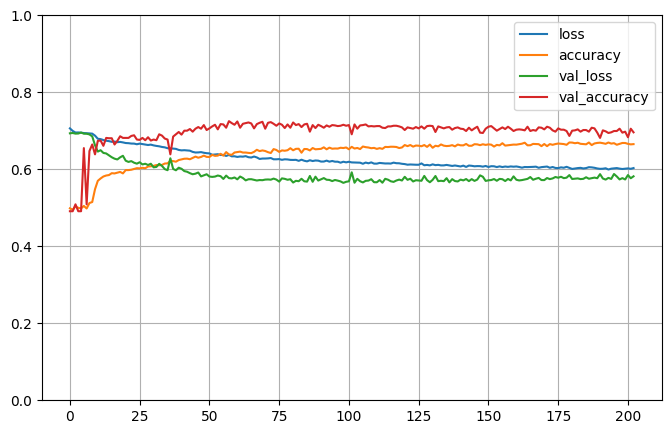


Testing # 2 1
2023-04-29 21:25:52.046537
PREDICT
Test 1:0 596:575 50.90%
Predict 1:0 588:583 50.21%
Test sizes (1171, 1025) (1171,)
Distrib of scores: 0.5137346 mean 0.20365176 std
Range of scores: 0.09934386 to 0.97405744
Score threshold 0.5
Confusion matrix
 [[413 162]
 [170 426]]
Normalized matrix
 [[0.35269001 0.1383433 ]
 [0.14517506 0.36379163]]
Extreme scores correct, pos:neg 288 248
Extreme scores incorrect pos:neg 62 59


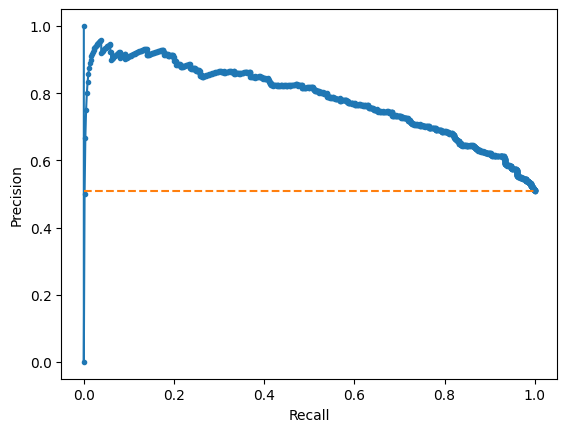

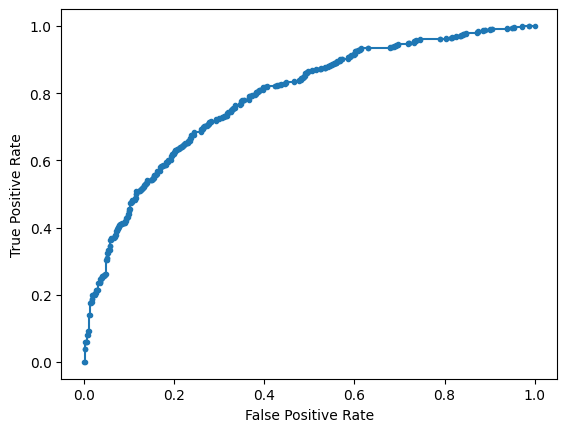

Accuracy: 71.65% Precision: 72.45% Recall: 71.48%
F1: 71.96% MCC: 0.4330
AUPRC: 78.36% AUROC: 78.61%
 accuracy [71.64816396242529]
 precision [72.44897959183673]
 recall [71.47651006711409]
 F1 [71.95945945945947]
 MCC [0.4329602794668753]
 AUPRC [78.36125487018577]
 AUROC [78.61336445871024]

Training # 2 2
2023-04-29 21:25:52.689108
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.2.2.validation_genes.txt
Discriminator ZERO 0
Train 1:0 5748:5182 52.59%
Computed class weights: {0: 1.054612118873022, 1: 0.9507654836464857}
Valid 1:0 592:606 49.42%
FIT


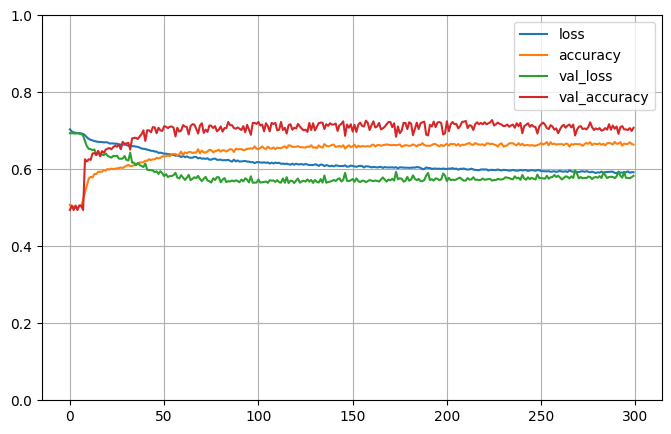


Testing # 2 2
2023-04-29 21:33:57.772150
PREDICT
Test 1:0 592:606 49.42%
Predict 1:0 548:650 45.74%
Test sizes (1198, 1025) (1198,)
Distrib of scores: 0.5214812 mean 0.22274281 std
Range of scores: 0.10963435 to 0.9783813
Score threshold 0.5
Confusion matrix
 [[453 153]
 [197 395]]
Normalized matrix
 [[0.37813022 0.12771285]
 [0.16444073 0.32971619]]
Extreme scores correct, pos:neg 247 231
Extreme scores incorrect pos:neg 60 58


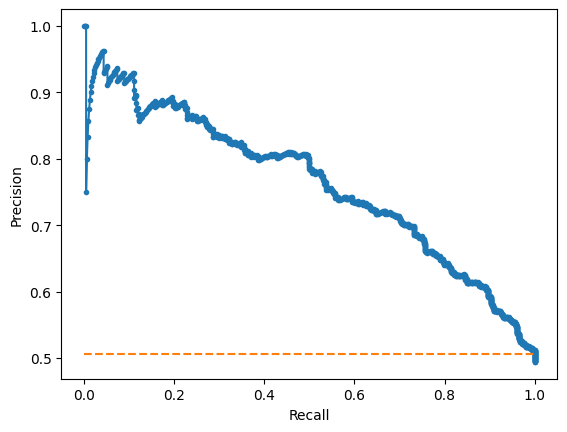

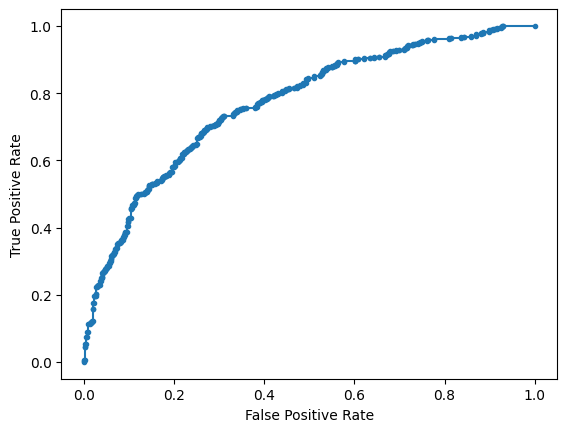

Accuracy: 70.78% Precision: 72.08% Recall: 66.72%
F1: 69.30% MCC: 0.4162
AUPRC: 76.16% AUROC: 76.99%
 accuracy [70.78464106844741]
 precision [72.08029197080292]
 recall [66.72297297297297]
 F1 [69.29824561403508]
 MCC [0.41623758772639996]
 AUPRC [76.15868387049576]
 AUROC [76.98688787797698]

Training # 2 3
2023-04-29 21:33:58.803285
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.2.3.validation_genes.txt
Discriminator ZERO 0
Train 1:0 5690:5240 52.06%
Computed class weights: {0: 1.04293893129771, 1: 0.960456942003515}
Valid 1:0 590:554 51.57%
FIT


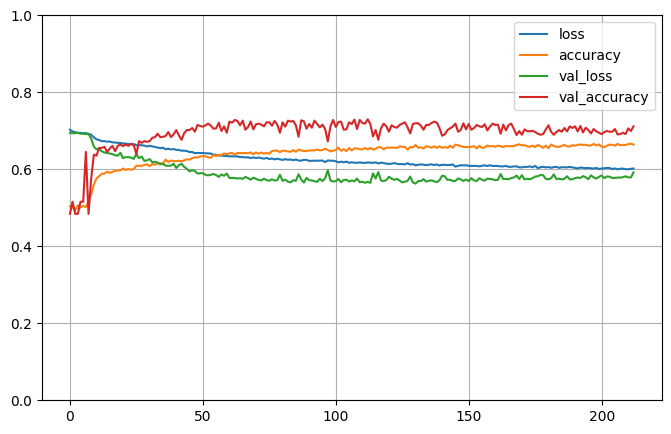


Testing # 2 3
2023-04-29 21:39:50.369281
PREDICT
Test 1:0 590:554 51.57%
Predict 1:0 595:549 52.01%
Test sizes (1144, 1025) (1144,)
Distrib of scores: 0.5315175 mean 0.2008704 std
Range of scores: 0.10254296 to 0.9822705
Score threshold 0.5
Confusion matrix
 [[397 157]
 [152 438]]
Normalized matrix
 [[0.34702797 0.13723776]
 [0.13286713 0.38286713]]
Extreme scores correct, pos:neg 274 212
Extreme scores incorrect pos:neg 59 50


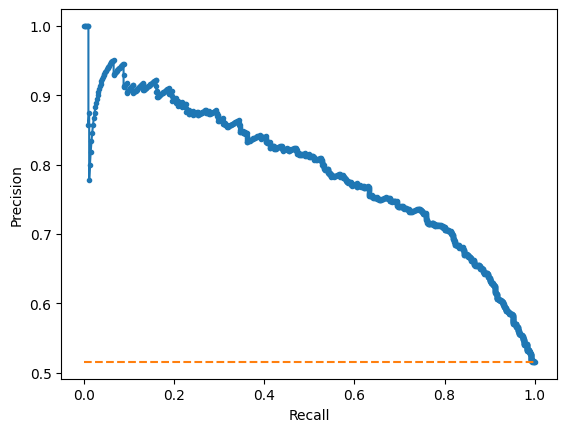

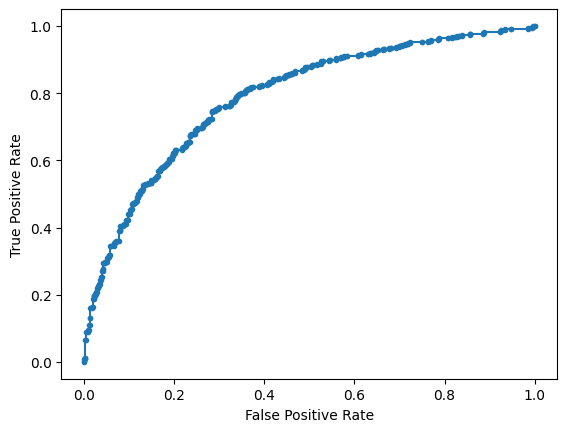

Accuracy: 72.99% Precision: 73.61% Recall: 74.24%
F1: 73.92% MCC: 0.4591
AUPRC: 79.00% AUROC: 78.86%
 accuracy [72.9895104895105]
 precision [73.61344537815127]
 recall [74.23728813559322]
 F1 [73.9240506329114]
 MCC [0.45912337859454944]
 AUPRC [78.9958322502787]
 AUROC [78.86465153276633]

Training # 2 4
2023-04-29 21:39:51.062661
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.2.4.validation_genes.txt
Discriminator ZERO 0
Train 1:0 5718:5213 52.31%
Computed class weights: {0: 1.048436600805678, 1: 0.9558412032179083}
Valid 1:0 606:596 50.42%
FIT


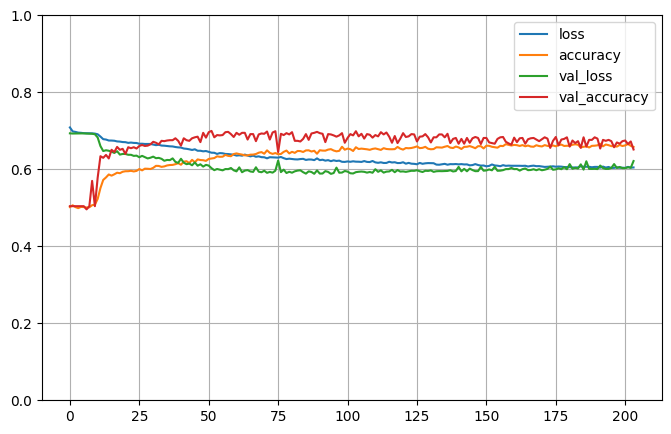


Testing # 2 4
2023-04-29 21:46:14.547835
PREDICT
Test 1:0 606:596 50.42%
Predict 1:0 534:668 44.43%
Test sizes (1202, 1025) (1202,)
Distrib of scores: 0.47228038 mean 0.19598576 std
Range of scores: 0.08828668 to 0.95247275
Score threshold 0.5
Confusion matrix
 [[451 145]
 [217 389]]
Normalized matrix
 [[0.37520799 0.12063228]
 [0.18053245 0.32362729]]
Extreme scores correct, pos:neg 209 286
Extreme scores incorrect pos:neg 45 94


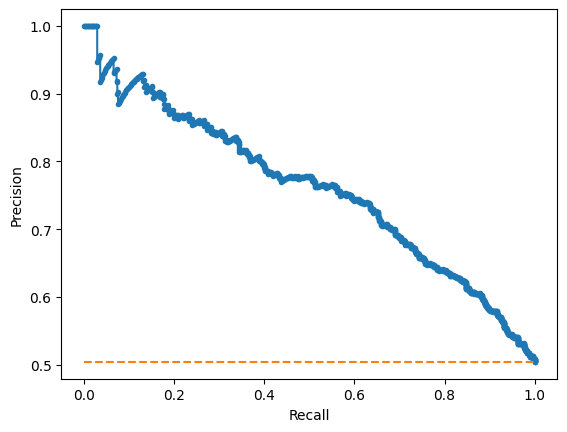

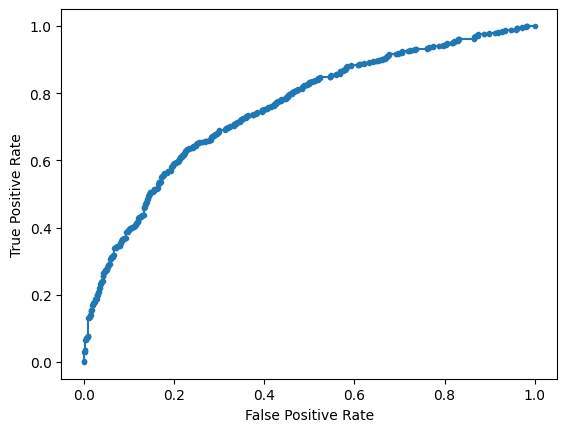

Accuracy: 69.88% Precision: 72.85% Recall: 64.19%
F1: 68.25% MCC: 0.4011
AUPRC: 76.03% AUROC: 75.40%
 accuracy [69.88352745424294]
 precision [72.84644194756554]
 recall [64.1914191419142]
 F1 [68.24561403508773]
 MCC [0.40111210541710746]
 AUPRC [76.03081758254882]
 AUROC [75.40146632112877]

Training # 2 5
2023-04-29 21:46:15.251793
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.2.5.validation_genes.txt
Discriminator ZERO 0
Train 1:0 5777:5154 52.85%
Computed class weights: {0: 1.0604384943733023, 1: 0.9460792799030638}
Valid 1:0 590:575 50.64%
FIT


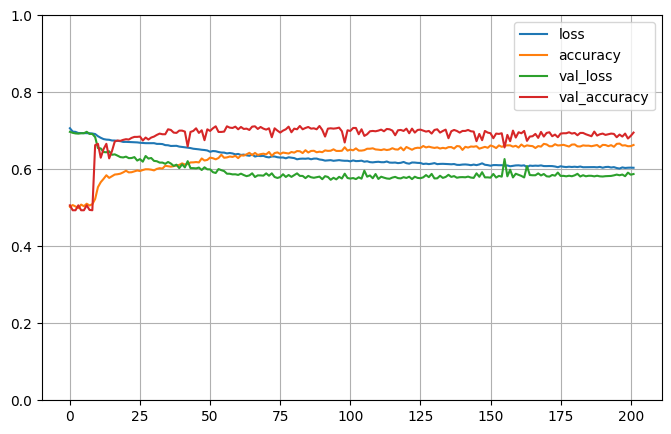


Testing # 2 5
2023-04-29 21:51:43.618651
PREDICT
Test 1:0 590:575 50.64%
Predict 1:0 521:644 44.72%
Test sizes (1165, 1025) (1165,)
Distrib of scores: 0.48972586 mean 0.1903696 std
Range of scores: 0.14070462 to 0.9606279
Score threshold 0.5
Confusion matrix
 [[439 136]
 [205 385]]
Normalized matrix
 [[0.37682403 0.1167382 ]
 [0.17596567 0.3304721 ]]
Extreme scores correct, pos:neg 230 258
Extreme scores incorrect pos:neg 36 81


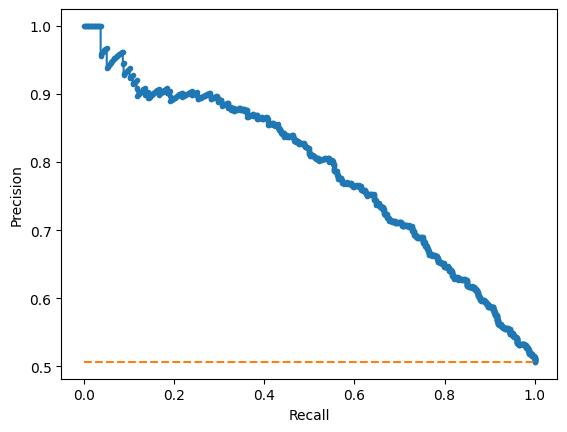

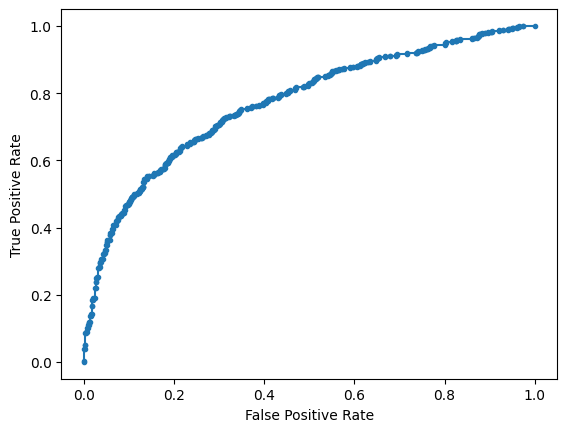

Accuracy: 70.73% Precision: 73.90% Recall: 65.25%
F1: 69.31% MCC: 0.4183
AUPRC: 78.66% AUROC: 77.14%
 accuracy [70.72961373390558]
 precision [73.89635316698656]
 recall [65.2542372881356]
 F1 [69.30693069306932]
 MCC [0.418324214358384]
 AUPRC [78.66131691858197]
 AUROC [77.14369933677227]
2023-04-29 21:51:44.338877


In [7]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator('pc')  # use pc filename prefix for mRNA
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                model,discrim = cvdo.get_models()
                save_model(model,discrim,filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            if LOAD_MODEL_FILENAME is not None:
                filename1 = LOAD_MODEL_FILENAME
                filename2 = LOAD_DESCRIM_FILENAME
                model, descrim = load_model(filename1, filename2)
                cvdo.set_models(model, descrim)
            else:
                cvdo.train_new_model(
                    train_allids,train_allseq,train_gene_to_rci,
                    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [8]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 71.39% std 0.99
 precision mean 73.23% std 1.19
 recall mean 68.49% std 4.92
 F1 mean 70.68% std 2.44
 MCC mean 0.4285 std 0.0194
 AUPRC mean 77.76% std 1.79
 AUROC mean 77.56% std 1.17
 accuracy [[70.44673539518901], [70.91531223267751], [72.06375838926175], [72.47863247863248], [71.9831223628692], [71.64816396242529], [70.78464106844741], [72.9895104895105], [69.88352745424294], [70.72961373390558]]
 precision [[73.30508474576271], [71.92716236722306], [72.93906810035843], [76.0914760914761], [73.10789049919485], [72.44897959183673], [72.08029197080292], [73.61344537815127], [72.84644194756554], [73.89635316698656]]
 recall [[61.347517730496456], [75.3577106518283], [69.10016977928693], [63.87434554973822], [73.34410339256866], [71.47651006711409], [66.72297297297297], [74.23728813559322], [64.1914191419142], [65.2542372881356]]
 F1 [[66.79536679536679], [73.60248447204968], [70.96774193548389], [69.44971537001898], [73.22580645161291], [71.95945945945947], [69.2982456